In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action =  'ignore')
import os
import seaborn as sns

## Healthcare PGP
-------
#### Predict whether or not a patient has diabetes

In [125]:
df = pd.read_csv(r"C:\Users\Owner\Downloads\Project_2\Project 2\Healthcare - Diabetes\health care diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### <font color = 'orange'> Data Preprocessing

In [126]:
df.shape

(768, 9)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [129]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [130]:
df.duplicated().sum()

0

In [131]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###### <font color = 'orange'> This dataset does not contain any null values

In [132]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### <font color = 'orange'> Missing Values Treatment <br>
###### <font color = 'teal'> - Although this dataset does not have any null values there are still some 0 values within some columns which need to be treated as null values. <br> - These missing values are imputed with the mean.

In [133]:
missing = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
#All 0 values within these columns are null values and need to be treated.

In [134]:
for col in missing:
    df[col].replace(0, df[col].mean(), inplace = True)

In [135]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


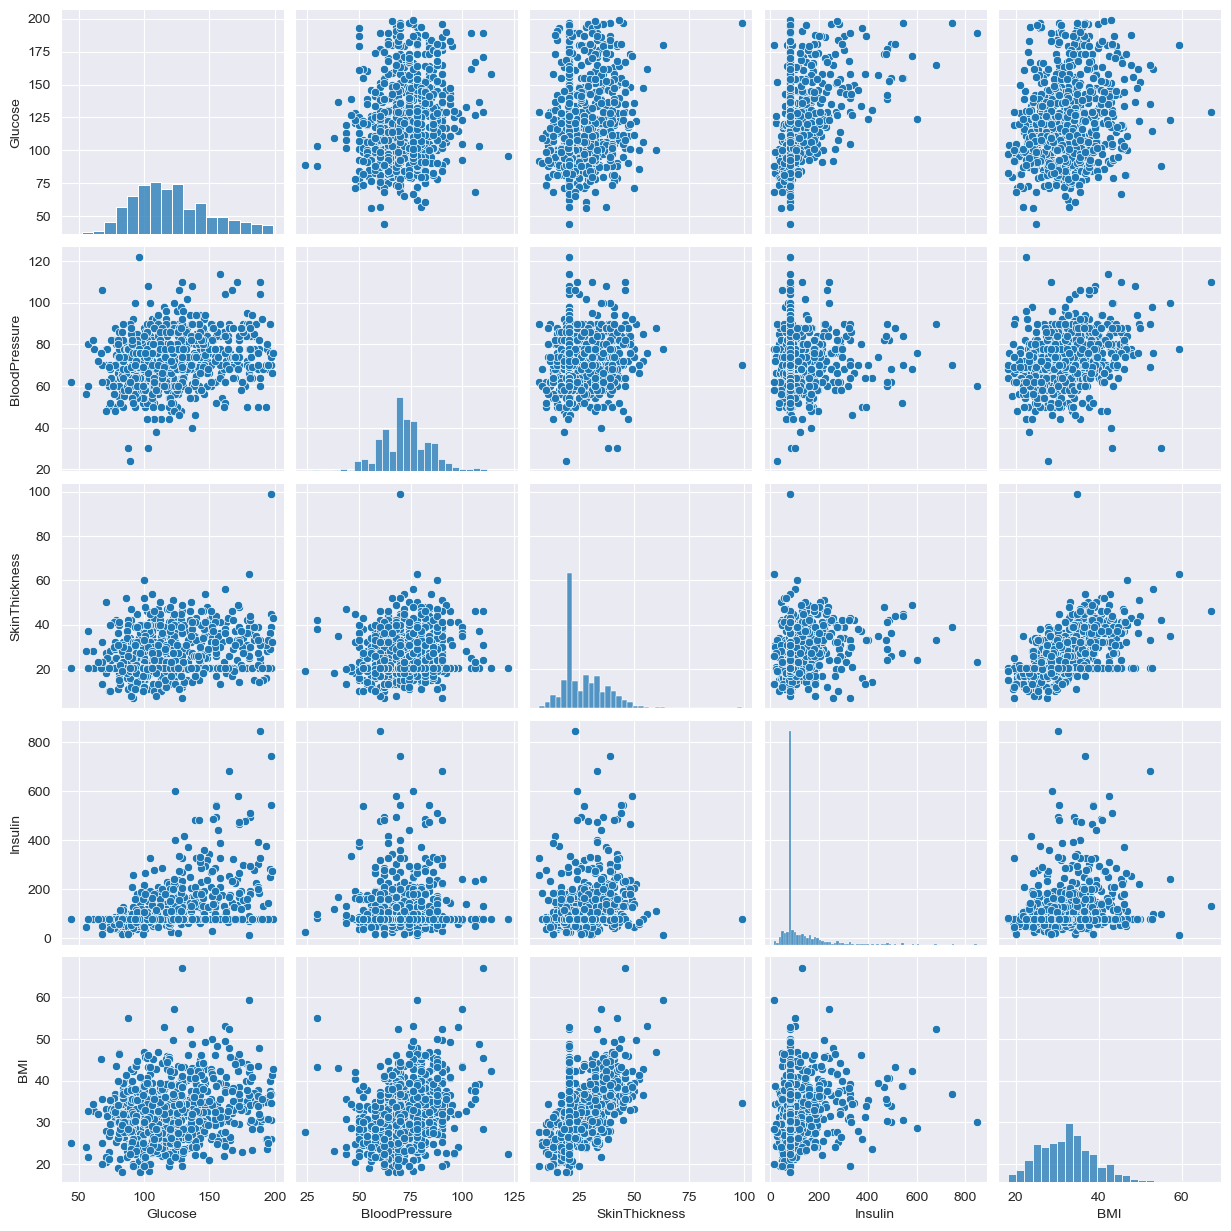

In [136]:
sns.pairplot(data = df, vars = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

#### Outlier Treatment

<Axes: ylabel='Count'>

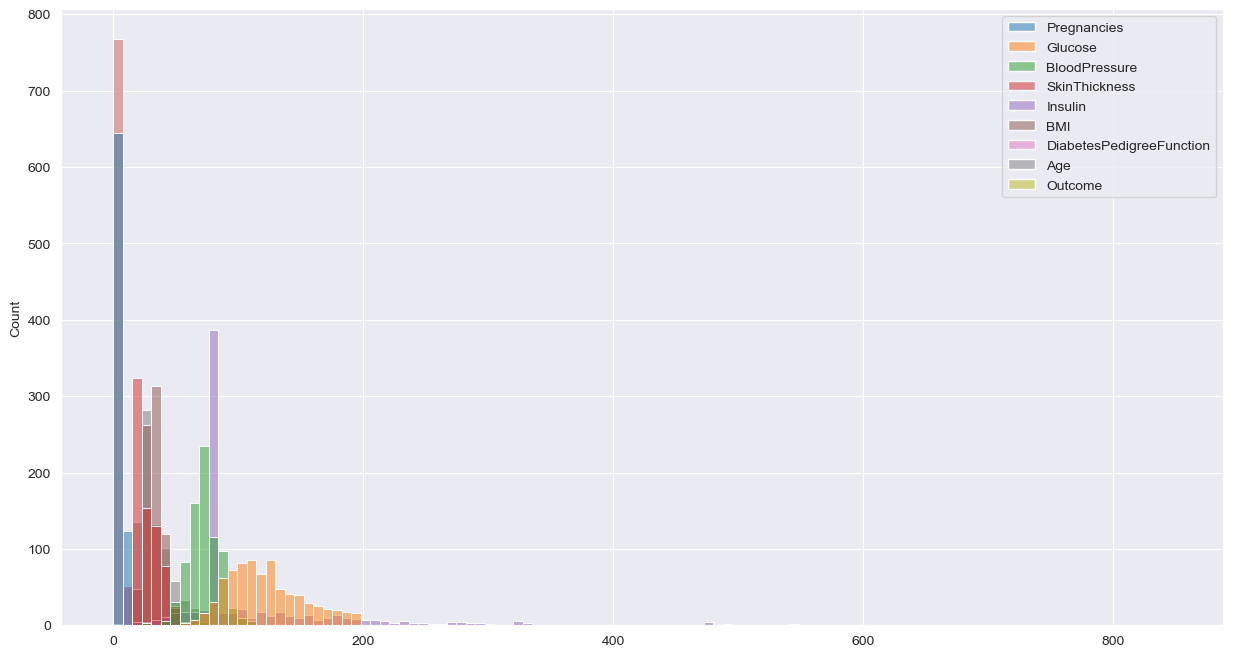

In [137]:
plt.figure(figsize= (15,8))
sns.histplot(data = df)

###### <font color = 'teal'> The data is right skewed

<Axes: >

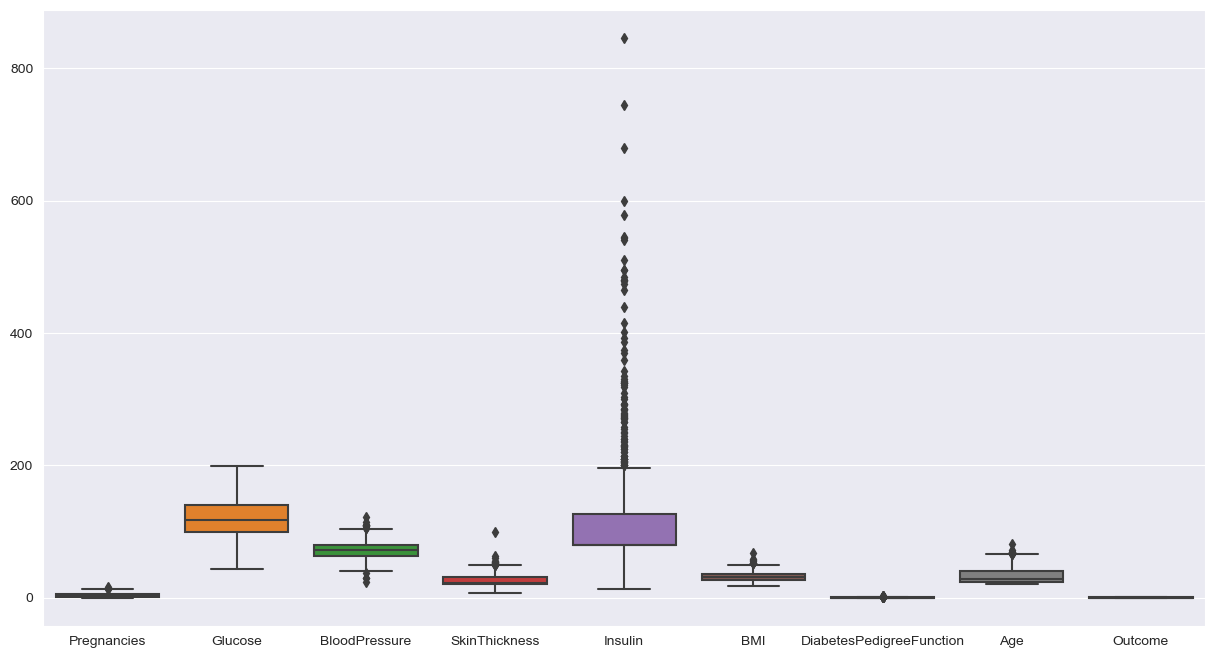

In [138]:
plt.figure(figsize = (15,8))
sns.boxplot(data = df)

###### <font color = 'orange'> Pregnancies, BloodPressure, SkinThickness, BMI, Insulin, and Age all have outliers

In [139]:
#outliers = df[['Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin', 'Age', 'Glucose']]
#for i in outliers.columns:
 #   plt.boxplot(outliers[i])
  #  plt.title(i)
   # plt.figure(figsize = (15, 8))
    #plt.show()

#### insulin Log transformation to deal with outliers

In [140]:
#sns.boxplot('Insulin', data = df)

In [141]:
#sns.distplot(df['Insulin'], bins=15, kde = False)

In [142]:
#df['Insulin_log'] = np.log(df['Insulin'])
#df['Insulin_log']

In [143]:
#df['Insulin']

In [144]:
#sns.boxplot('Insulin_log', data = df)

#### Handling outliers using the standard deviation/ z-score approach

In [145]:
#df.Insulin.describe()

In [146]:
#def remove_outliers(df, columns, n_std):
 #   for col in columns:
  #      print('Working on columns: {}'.format(col))
#
 #       mean = df[col].mean()
  #      sd = df[col].std()

   #     df = df[(df[col] <= mean+(n_std*sd))]

    #return df

In [147]:
#plt.figure(figsize =(15, 8))
#sns.boxplot(data = df)

In [148]:
# Pregnancies
#df = df.drop(df[df['Pregnancies'] > 13].index)

In [149]:
# BloodPressure
#df = df.drop(df[(df['BloodPressure'] > 98) | (df['BloodPressure'] < 38)].index)

In [150]:
# SkinThickness
#df = df.drop(df[df['SkinThickness'] > 39].index)

In [151]:
# BMI
#df = df.drop(df[df['BMI'] > 47].index)

In [152]:
# Insulin
#df = df.drop(df[(df['Insulin'] > 200)].index) #| (df['Insulin'] < 14)].index)

In [153]:
# Age
#df = df.drop(df[df['Age'] > 64.5].index)

In [154]:
# Glucose
#df = df.drop(df[df['Glucose'] > 185].index)

In [155]:
#plt.figure(figsize = (15,8))
#sns.boxplot(data = df, showfliers = False)

In [156]:
df.Insulin.describe()

count    768.000000
mean     118.660163
std       93.080358
min       14.000000
25%       79.799479
50%       79.799479
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

<Axes: ylabel='Insulin'>

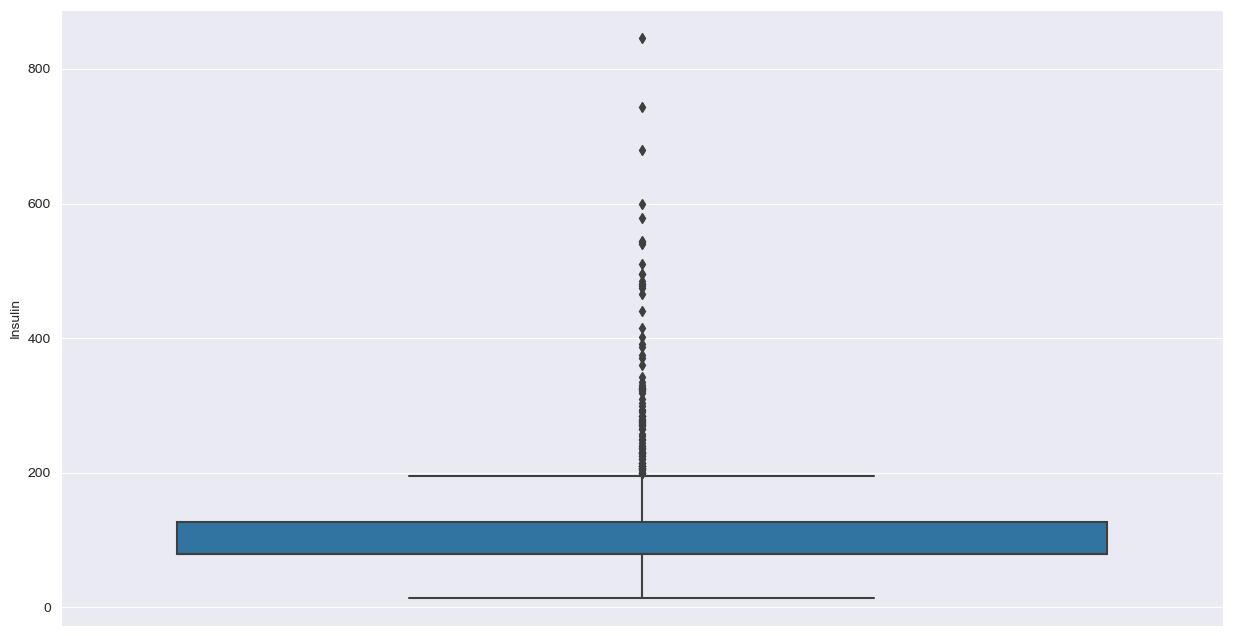

In [157]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, y='Insulin')

<Axes: xlabel='Insulin'>

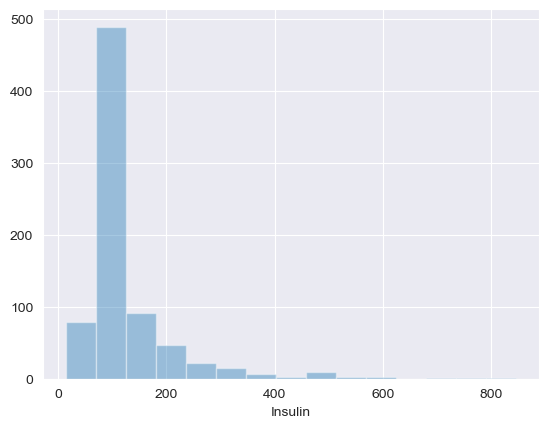

In [158]:
sns.distplot(df['Insulin'], bins = 15, kde = False)

float64    6
int64      3
dtype: int64


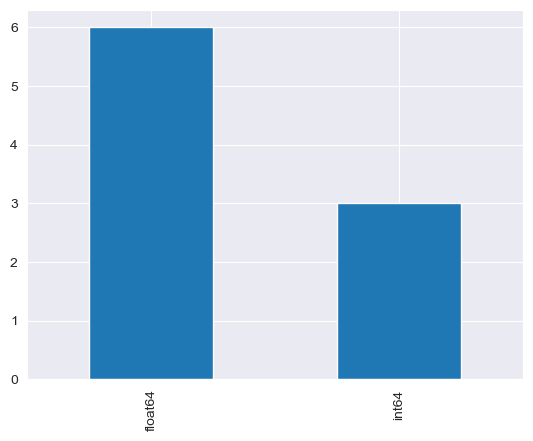

In [159]:
a = df.dtypes.value_counts()
a.plot(kind = 'bar')
print(a)

In [160]:
print(df.Outcome.value_counts(normalize = True))
df.Outcome.value_counts()

0    0.651042
1    0.348958
Name: Outcome, dtype: float64


0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

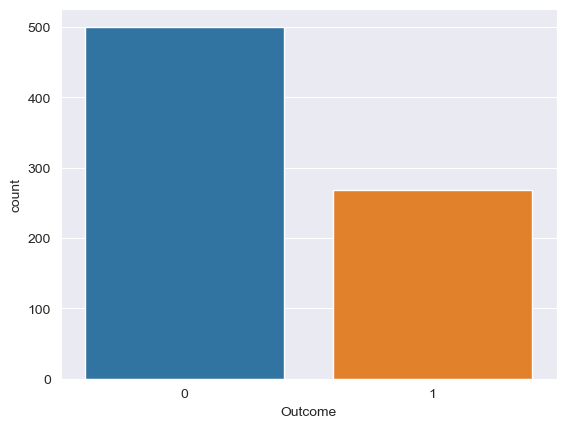

In [161]:
sns.countplot(x=df['Outcome'])

###### <font color ='orange'> 268 individuals in our dataset have diabetes while 500 do not.

#### Glucose

In [162]:
df.groupby('Outcome')['Glucose'].mean().round(0)

Outcome
0    111.0
1    142.0
Name: Glucose, dtype: float64

###### <font color ='orange'> The average glucose level of individuals with diabetes is 142, and 111 for individuals who do not have diabetes.

In [163]:
df.Glucose.value_counts()

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64

In [164]:
df.Glucose.describe().round(0)

count    768.0
mean     122.0
std       30.0
min       44.0
25%      100.0
50%      117.0
75%      140.0
max      199.0
Name: Glucose, dtype: float64

###### <font color = 'orange'> The average glucose concentration is 121.68. <br> 25th percentile: 25% of individuals have a glucose concentration of 100 or lower. <br> 50th percentile: 50% of individuals have a glucose concentration of 117 or lower. <br> 75% of individuals have a glucose concentration of 140 or lower.

In [165]:
df['Glu_Cat'] = df.apply(lambda x: 'GC1' if x ['Glucose'] <= 100 else \
                                    'GC2' if ((x['Glucose'] >= 101) & (x['Glucose'] <= 121)) else \
                                        'GC3' if ((x['Glucose'] >= 122) & (x['Glucose'] <= 140)) else 'GC4', axis =1)
df['Glu_Cat'].value_counts()

GC2    216
GC1    209
GC4    192
GC3    151
Name: Glu_Cat, dtype: int64

###### <font color = 'orange'> GC1: 209 individuals have glucose levels below 101 <br> GC2: 216 individuals have glucose levels between 101 and 121 (the highest of all 4 categories) <br> GC3: 151 individuals have glucose levels between 122 and 140 (the lowest among all categories) <br> GC4: 192 individuals have glucose levels greater than 140

Outcome    0    1
Glu_Cat          
GC1      191   18
GC2      159   57
GC3       90   61
GC4       60  132


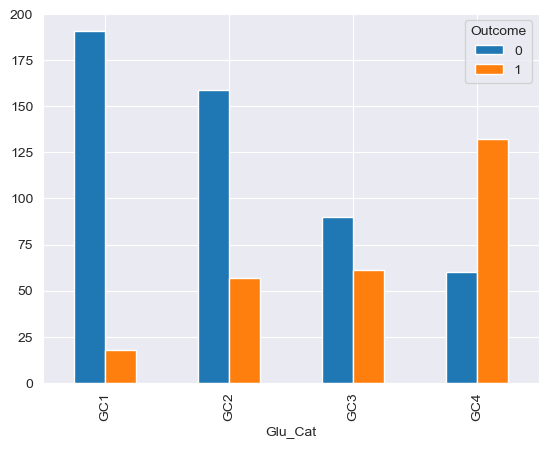

In [166]:
a = pd.crosstab(df.Glu_Cat, df.Outcome)
a.plot(kind = 'bar')
print(a)

###### <font color ='orange'> Of the 209 individuals in GC1: <br> - 191 did not develop diabetes while 18 did. <br> Of the 216 individuals in GC2: <br> - 159 did not develop diabetes while 57 did. <br> Of the 151 individuals in GC3: <br> - 90 did not develop diabetes while 61 did. <br> Of the 192 individuals in GC4: <br> - 60 did not develop diabetes while 132 did.
------
###### <font color = 'teal'> GC4 has the highest count of individuals who developed diabetes. <br> - meaning individuals with a glucose concentration over 140 might are at a higher risk to develop diabetes.

<Axes: xlabel='Outcome', ylabel='Glucose'>

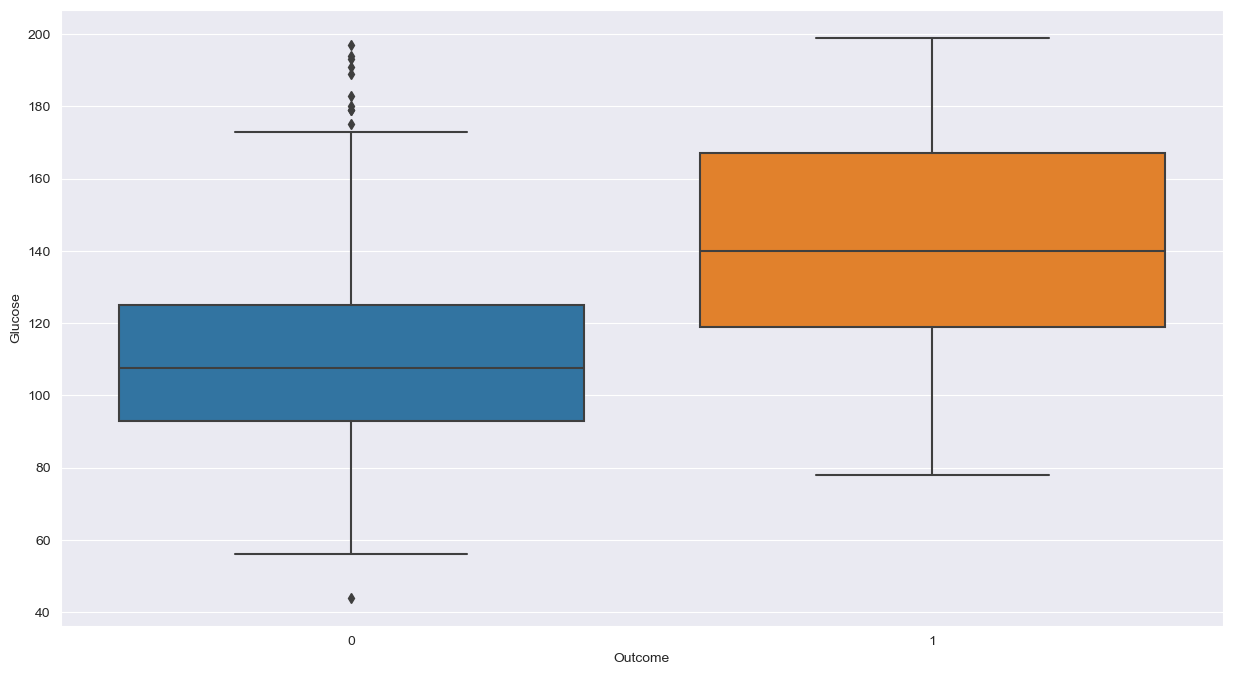

In [167]:
plt.figure(figsize=(15,8))
sns.boxplot(y = 'Glucose', x = 'Outcome', data = df)

In [168]:
import statsmodels.formula.api as smf
m1 = smf.logit(
    formula = 'Outcome ~ Glucose',
    data = df)\
    .fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.516583
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                  0.2013
Time:                        23:48:41   Log-Likelihood:                -396.74
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.076e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7077      0.437    -13.048      0.000      -6.565      -4.850
Glucose        0.0406      0.

###### <font color = 'green'> The P-value is less than 0.05 therefore is a predictor of diabetes.


#### Blood Pressure

In [169]:
df.groupby('Outcome')['BloodPressure'].mean().round(0)

Outcome
0    71.0
1    75.0
Name: BloodPressure, dtype: float64

###### <font color ='orange'> The average BloodPressure of individuals with diabetes is 75, and 71 for individuals without diabetes.

In [170]:
df.BloodPressure.describe()

count    768.000000
mean      72.254807
std       12.115932
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [171]:
df['BP_Cat'] = df.apply(lambda x: 'BP_C1' if x['BloodPressure'] <= 64 else \
                        'BP_C2' if ((x['BloodPressure'] >= 65) & (x['BloodPressure'] <= 72)) else \
                            'BP_C3' if ((x['BloodPressure'] >= 73) & (x['BloodPressure'] <= 80)) else \
                                'Bp_C4' if ((x['BloodPressure'] >= 81) & (x['BloodPressure'] <= 100)) else 'BP_C5', axis =1)
df['BP_Cat'].value_counts()

BP_C2    218
BP_C1    201
BP_C3    184
Bp_C4    152
BP_C5     13
Name: BP_Cat, dtype: int64

###### <font color = 'orange'> BP_C1: 201 individuals have Blood Pressure levels below 65. <br> BP_C2: 218 individuals have Blood Pressure levels between 65 and 72. <br> BP_C3: 184 individuals have Blood Pressure levels between 73 and 80. <br> BP_C4: 152 individuals have Blood Pressure levels between 81 and 100. <br> BP_C5: 13 individuals have Blood Pressure levels greater than 100.

Outcome    0   1
BP_Cat          
BP_C1    155  46
BP_C2    139  79
BP_C3    118  66
BP_C5      5   8
Bp_C4     83  69


<Axes: xlabel='BP_Cat'>

<Figure size 1500x800 with 0 Axes>

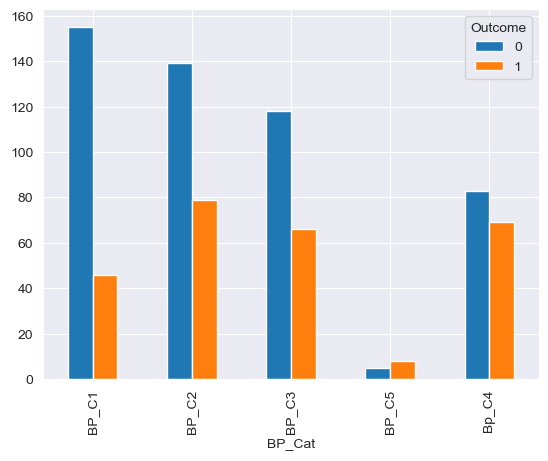

In [172]:
b = pd.crosstab(df.BP_Cat, df.Outcome)
print(b)
plt.figure(figsize = (15, 8))
b.plot(kind = 'bar')

###### <font color = 'orange'> Of the 201 individuals in **BP_C1**: <br> - **155 did not** develop diabetes while **46 did**. <br> Of the 218 individuals in **BP_C2**: <br> - **139 did not** develop diabetes while **79 did**. <br> Of the 184 individuals in **BP_C3**: <br> - **118 did not** develop diabetes while **66 did**. <br> Of the 152 individuals in **BP_C4**: <br> - **83 did not** develop diabetes while **69 did**. <br> Of the 13 individuals in **BP_C5**: <br> - **5 did not** develop diabetes while **8 did**.
-----
###### <font color ='teal'> Individuals with a Blood poressure greater than 80 are at a high risk of developing diabetes.

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

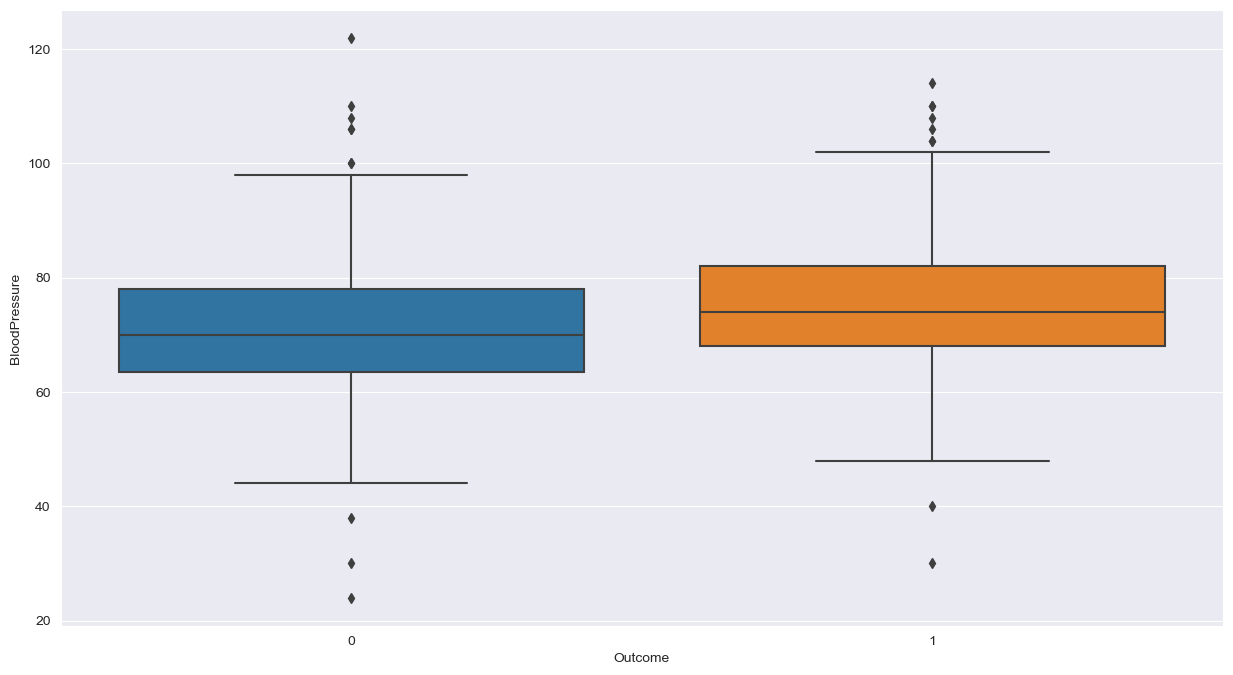

In [174]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = df.Outcome, y = df.BloodPressure, data = df)

In [175]:
import statsmodels.formula.api as smf
m1 = smf.logit(formula = 'Outcome ~ BloodPressure', data = df).fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.633366
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                 0.02077
Time:                        23:51:37   Log-Likelihood:                -486.42
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.560e-06
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.7348      0.485     -5.639      0.000      -3.685      -1.784
BloodPressure     0.

###### <font color = 'orange'> p-value is less than 0.05, therefore BP is a strong predictor of diabetes.

#### SkinThickness

In [176]:
df.groupby('Outcome')['SkinThickness'].mean().round(1)

Outcome
0    25.4
1    28.9
Name: SkinThickness, dtype: float64

###### <font color='orange'> The average SkinThickness for individuals with diabetes in the dataset is 28.9 and 25.5 for individuals without diabetes.

In [177]:
df.SkinThickness.describe()

count    768.000000
mean      26.606479
std        9.631241
min        7.000000
25%       20.536458
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [178]:
df['ST_C'] = df.apply(lambda x: 'ST_C1' if x['SkinThickness'] <= 20 else\
                      'ST_C2' if ((x['SkinThickness'] >= 21) & (x['SkinThickness'] <= 29)) else\
                          'ST_C3' if ((x['SkinThickness'] >= 30) & (x['SkinThickness'] <= 40)) else\
                              'ST_C4' if ((x['SkinThickness'] >= 41) & (x['SkinThickness'] <= 70)) else\
                                  'ST_C5' if ((x['SkinThickness'] >= 71) & (x['SkinThickness'] <= 100)) else 'ST_C6', axis =1)
df['ST_C'].value_counts()

ST_C6    227
ST_C3    191
ST_C2    152
ST_C1    124
ST_C4     73
ST_C5      1
Name: ST_C, dtype: int64

Outcome    0   1
ST_C            
ST_C1    107  17
ST_C2    106  46
ST_C3    111  80
ST_C4     37  36
ST_C5      0   1
ST_C6    139  88


<Axes: xlabel='ST_C'>

<Figure size 1500x800 with 0 Axes>

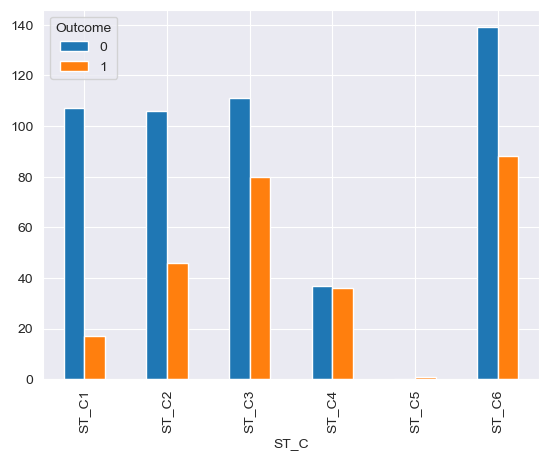

In [179]:
c = pd.crosstab(df.ST_C, df.Outcome)
print(c)
plt.figure(figsize=(15, 8))
c.plot(kind ='bar')

In [180]:
import statsmodels.formula.api as smf
m1 = smf.logit(formula = 'Outcome ~ SkinThickness', data = df).fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.631628
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                 0.02346
Time:                        23:51:51   Log-Likelihood:                -485.09
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.384e-06
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.6561      0.234     -7.071      0.000      -2.115      -1.197
SkinThickness     0.

###### <font color = 'orange'> p-value is less than 0.05.

#### Age

In [181]:
df.groupby('Outcome')['Age'].mean().round(0)

Outcome
0    31.0
1    37.0
Name: Age, dtype: float64

###### <font color = 'orange' > The average age of an individual with diabetes in this dataset is 37 years old, and the average of those who do not have diabetes is 31 years old.

In [182]:
#check age
df.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [183]:
df['Age_Cat'] = df.apply(lambda x: '21 - 25' if ((x['Age'] >= 21) & (x['Age'] <= 25)) else \
                                    '26 - 35' if ((x['Age'] >= 26) & (x['Age'] <= 35)) else\
                                        '36 - 45' if ((x['Age'] >= 36) & (x['Age'] <= 45)) else\
                                            '46 - 55' if ((x['Age'] >= 46) & (x['Age'] <= 55)) else\
                                                '56 - 65' if ((x['Age'] >= 56) & (x['Age'] <= 65)) else '> 65', axis =1)
df['Age_Cat'].value_counts()

21 - 25    267
26 - 35    231
36 - 45    152
46 - 55     68
56 - 65     37
> 65        13
Name: Age_Cat, dtype: int64

Outcome    0   1
Age_Cat         
21 - 25  222  45
26 - 35  145  86
36 - 45   73  79
46 - 55   27  41
56 - 65   24  13
> 65       9   4


<Axes: xlabel='Age_Cat'>

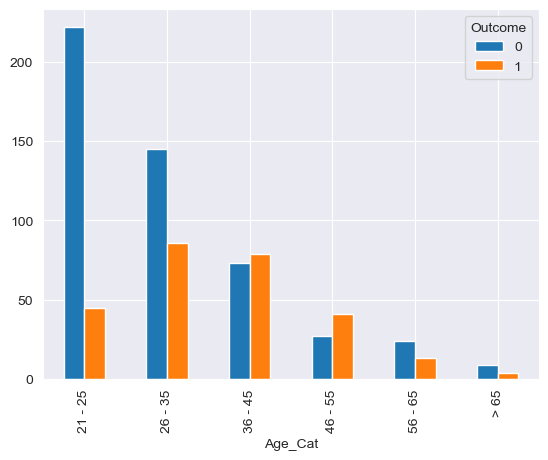

In [184]:
d = pd.crosstab(df.Age_Cat, df.Outcome)
print(d)
d.plot(kind = 'bar')

###### <font color = 'orange'> Of 267 people between the ages of **21 and 25**: </font><br> <font color = 'teal'> - **45 developed diabetes** while **222 did not**. <br> <font color = 'orange'> Of 231 people between the ages of **26 and 35**: </font><br> <font color = 'teal'> - **86 developed diabetes** while **145 did not**. </font><br> <font color = 'orange'> Of 152 people between the ages of **36 and 45**: </font><br> <font color = 'teal'> - **145 developed diabetes** while **86 did not**. </font><br> <font color = 'orange'> Of 11 people between the ages of **36 and 45**: </font><br> <font color = 'teal'> - **79 developed diabetes** while **73 did not**. </font><br> <font color = 'orange'> Of 68 people between the ages of **46 and 55**: </font><br> <font color = 'teal'> - **41 developed diabetes** while **27 did not**.</font><br> <font color = 'orange'> Of 37 people between the ages of **56 and 65**: </font><br> <font color = 'teal'> - **13 developed diabetes** while **24 did not**. </font><br> <font color = 'orange'> Of 13 people over the age of **65**: </font><br> <font color = 'teal'> - **4 developed diabetes** while **7 did not**. </font><br>

<Axes: xlabel='Outcome', ylabel='Age'>

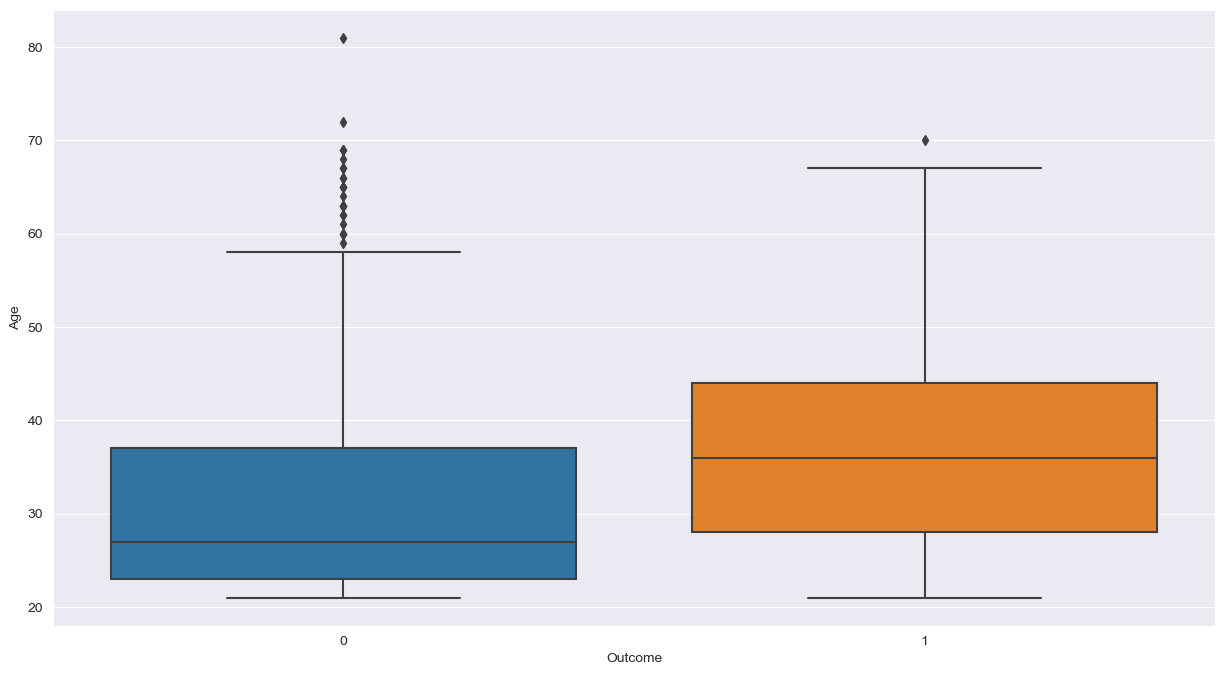

In [186]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df.Outcome, y = df.Age, data = df)

###### <font color = 'teal'> Individuals aged 36-55 have a high risk of developing diabetes while individuals aged 46-55 have the highest percentage of developing diabetes.

In [187]:
import statsmodels.formula.api as smf
m1 = smf.logit(formula = 'Outcome ~ Age', data=df).fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.618959
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                 0.04304
Time:                        23:52:29   Log-Likelihood:                -475.36
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 6.177e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0475      0.239     -8.572      0.000      -2.516      -1.579
Age            0.0420      0.

###### <font color ='orange'> Age is a strong predictor of diabetes.

#### Insulin

In [188]:
df.groupby('Outcome')['Insulin'].mean().round(0)

Outcome
0    106.0
1    141.0
Name: Insulin, dtype: float64

###### <font color ='orange'> The average insulin level of individuals with diabetes in the dataset is 141, and 106 for individuals who do not have diabetes.

In [190]:
df.Insulin.describe()

count    768.000000
mean     118.660163
std       93.080358
min       14.000000
25%       79.799479
50%       79.799479
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [191]:
df['In_C'] = df.apply(lambda x: '<= 78' if x['Insulin'] <= 78 else \
                                '79-80' if ((x['Insulin'] >= 79) & (x['Insulin'] <= 80)) else \
                                '81-100' if ((x['Insulin'] >= 81) & (x['Insulin'] <= 100)) else\
                                '101-130' if ((x['Insulin'] >= 101) & (x['Insulin'] <= 130)) else\
                                '131-150' if ((x['Insulin'] >= 131) & (x['Insulin'] <= 150)) else \
                                '151-180' if ((x['Insulin'] >= 151) & (x['Insulin'] <=180)) else '>180', axis =1)
df['In_C'].value_counts()

79-80      376
>180       109
<= 78      103
101-130     62
81-100      46
151-180     44
131-150     28
Name: In_C, dtype: int64

Outcome    0    1
In_C             
101-130   41   21
131-150   17   11
151-180   21   23
79-80    237  139
81-100    36   10
<= 78     95    8
>180      53   56


<Axes: xlabel='In_C'>

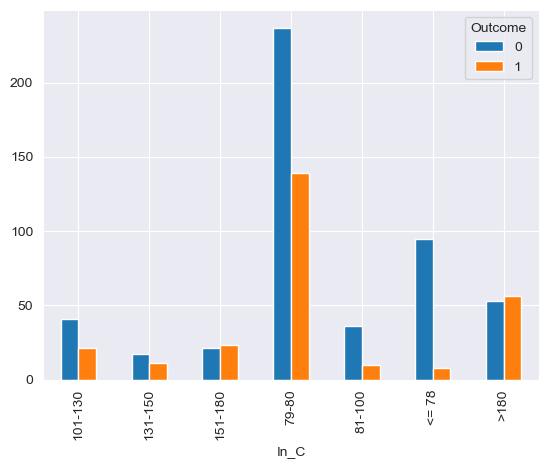

In [192]:
a = pd.crosstab(df.In_C, df.Outcome)
print(a)
a.plot(kind = 'bar')

In [193]:
df.groupby('In_C')['Age'].mean().reset_index()

,In_C,Age
0,101-130,31.838710
1,131-150,33.714286
2,151-180,32.181818
3,79-80,35.805851
4,81-100,26.500000
5,<= 78,27.485437
6,>180,33.779817


<Axes: xlabel='Outcome', ylabel='Insulin'>

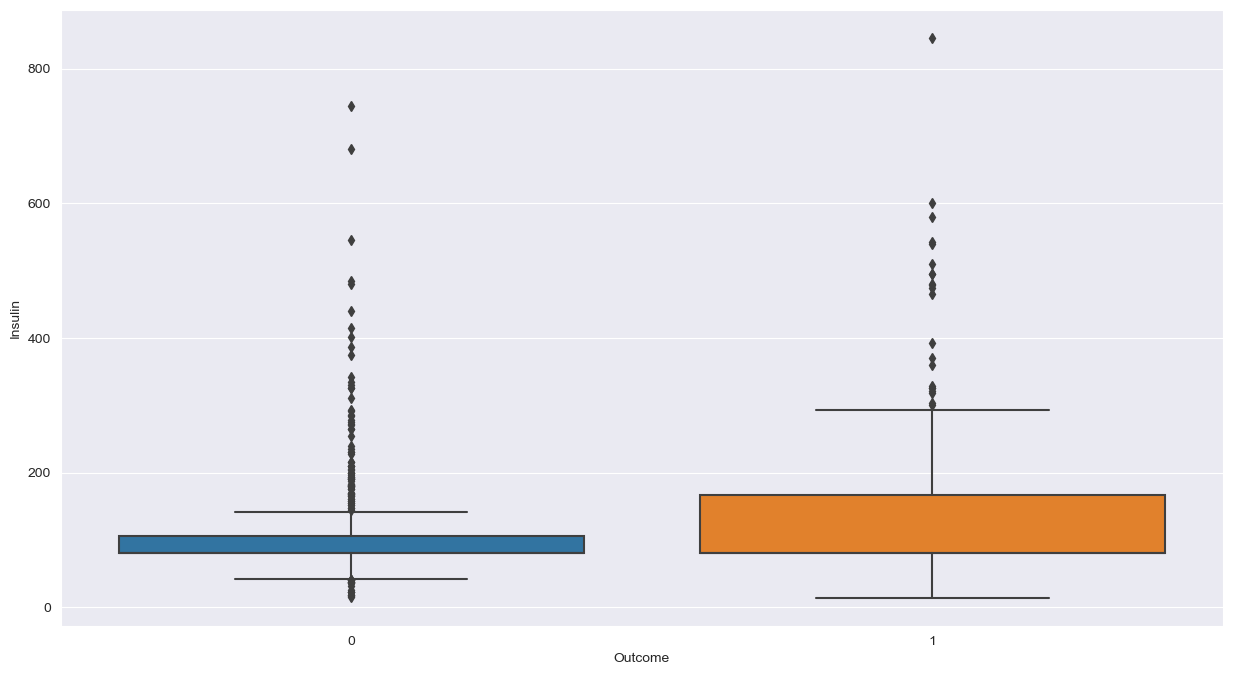

In [195]:
plt.figure(figsize =(15, 8))
sns.boxplot(x = df.Outcome, y = df.Insulin, data = df)

In [196]:
import statsmodels.formula.api as smf
m1 = smf.logit(formula = 'Outcome ~ Insulin', data = df).fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.631254
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                 0.02403
Time:                        23:53:10   Log-Likelihood:                -484.80
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.026e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1084      0.130     -8.535      0.000      -1.363      -0.854
Insulin        0.0040      0.

###### <font color='orange'> Age is a strong predictor of diabetes.

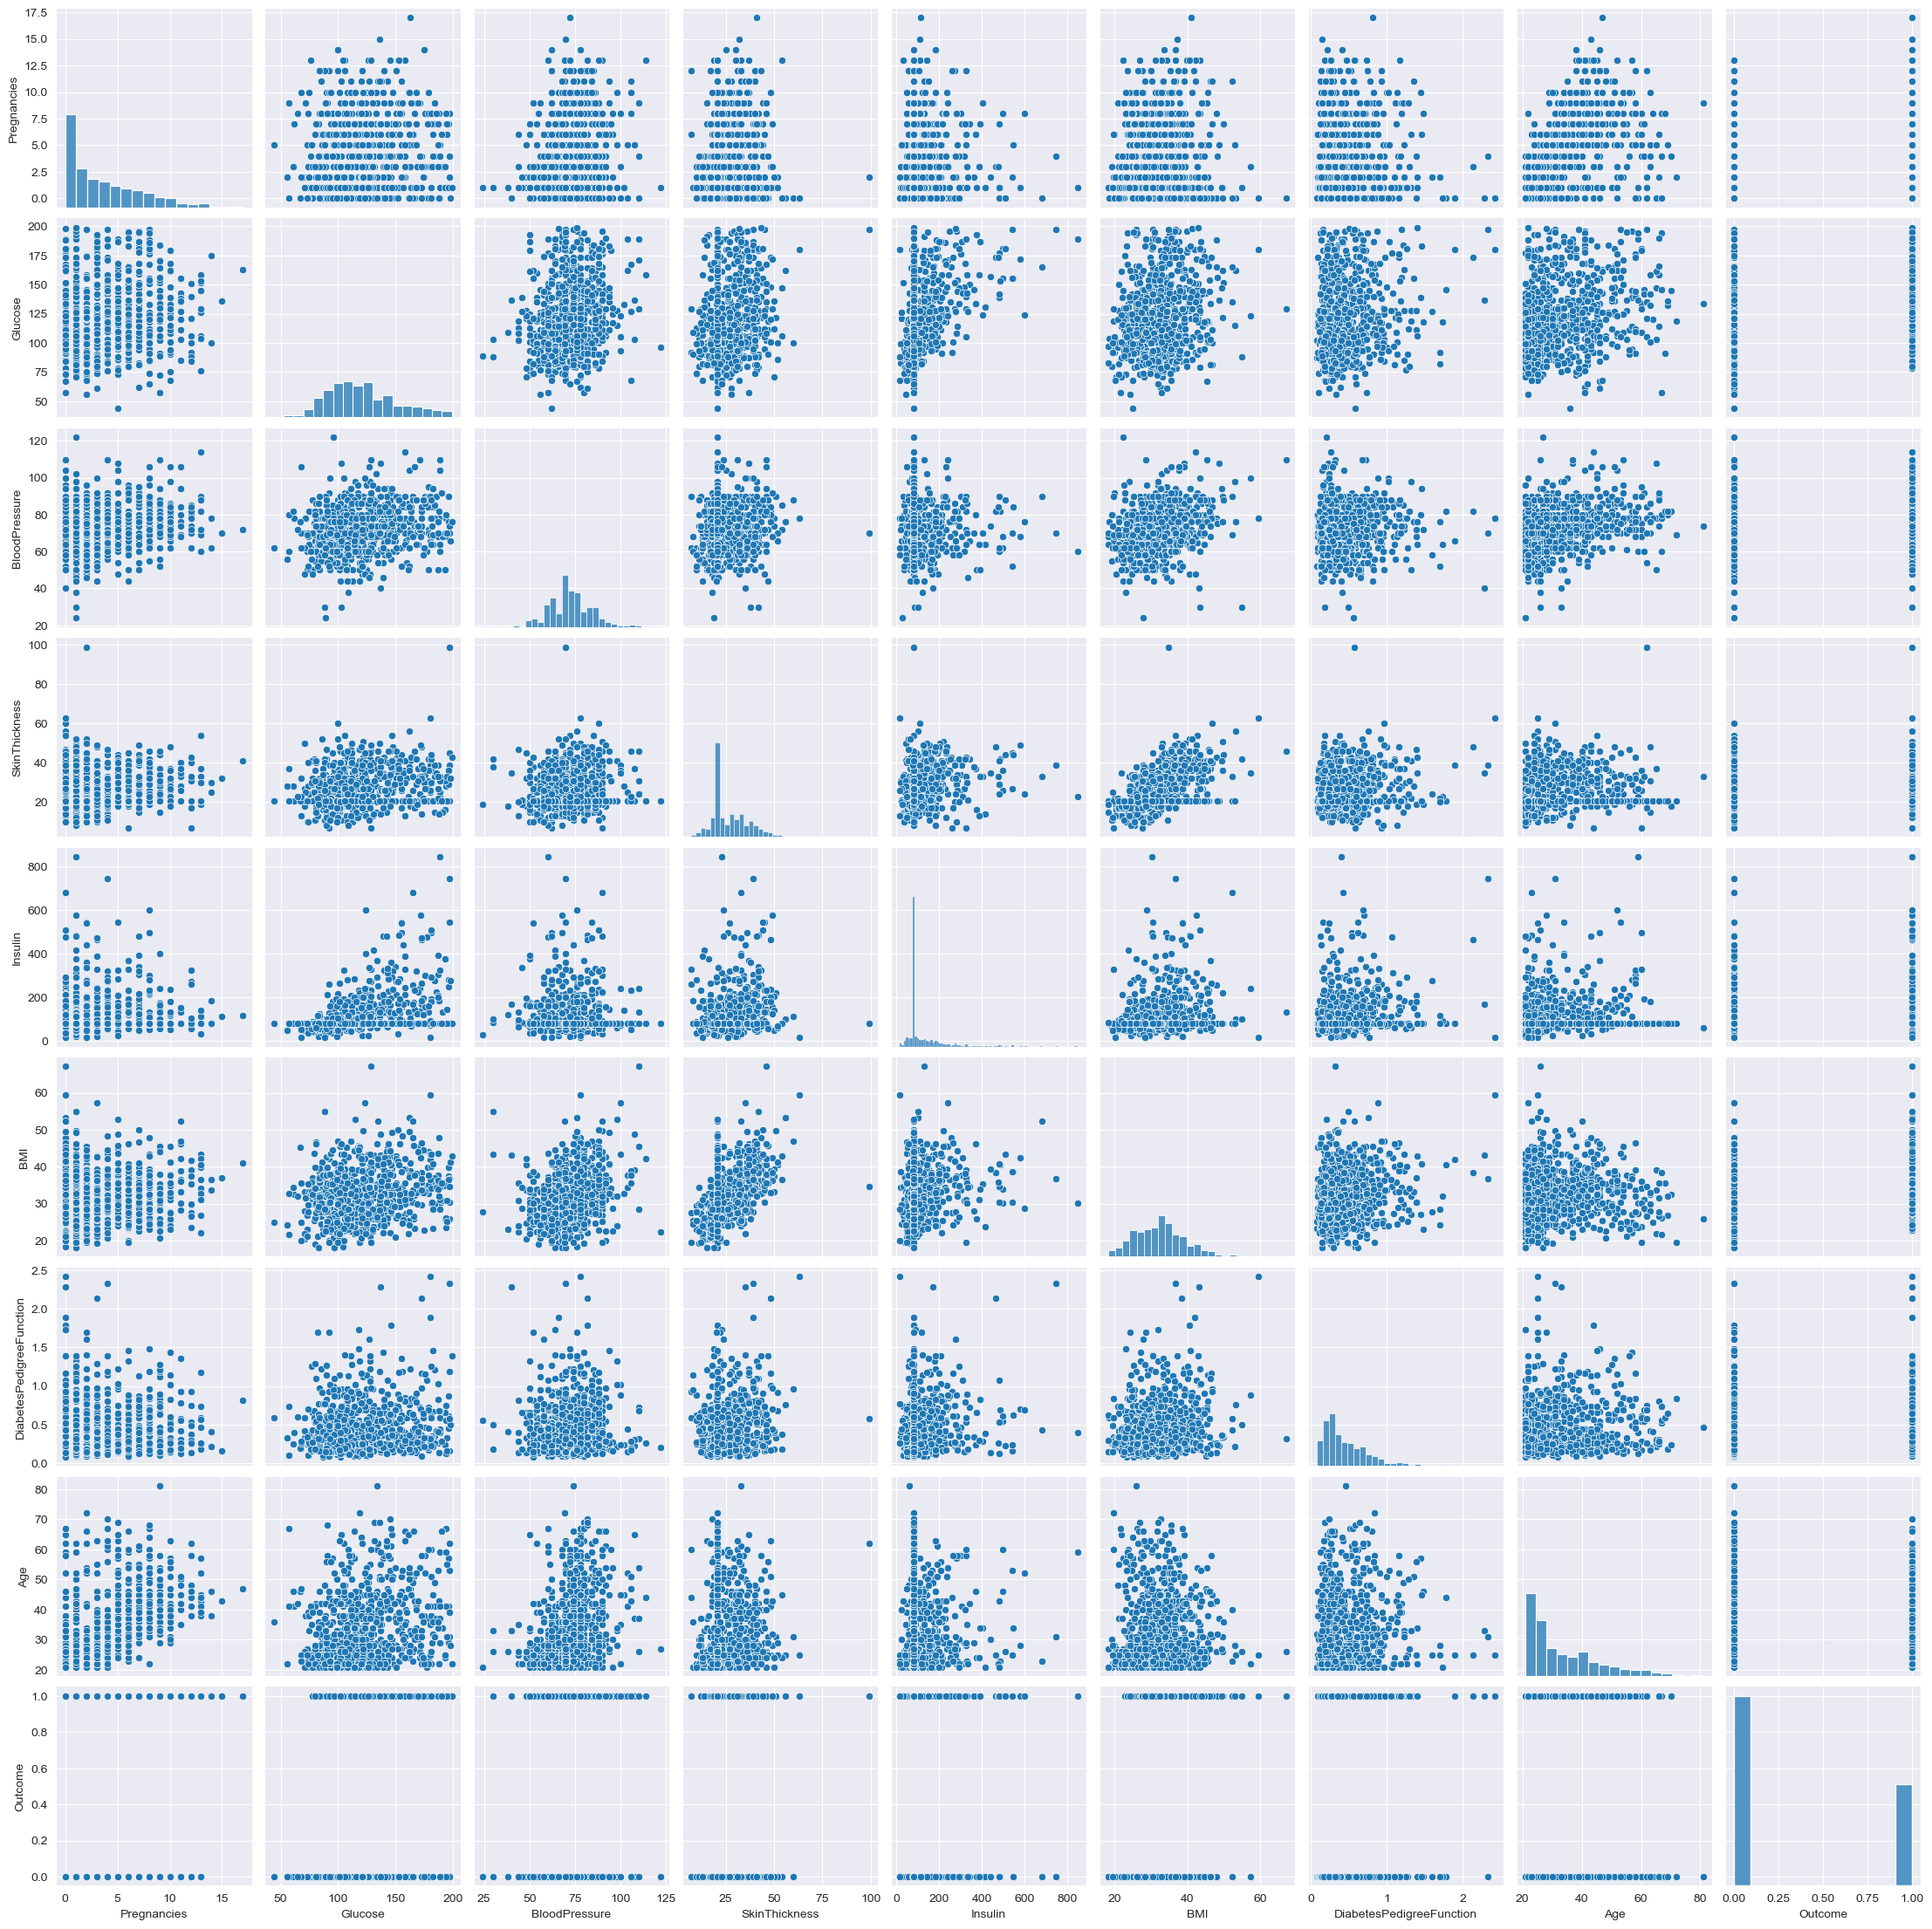

In [197]:
sns.pairplot(df)

<Axes: >

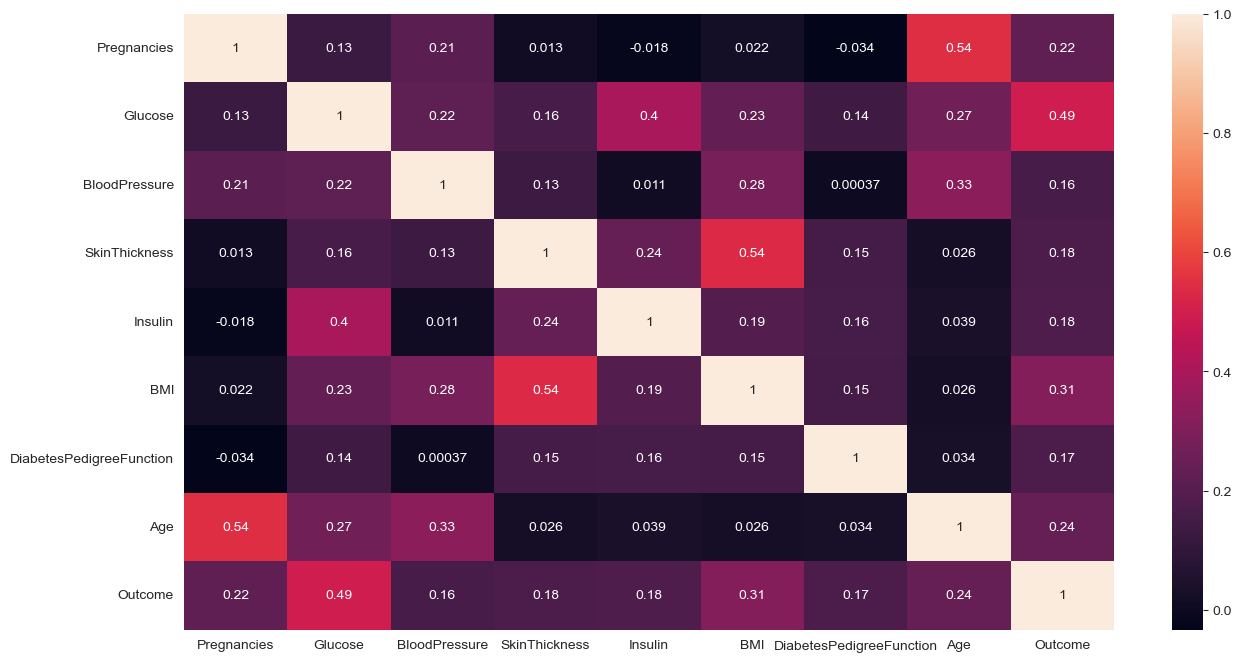

In [198]:
corr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot = True)

###### <font color='orange'> The pairwise correlation between BMI and Skin thickness (0.54) and pregnancies and age (0.54) are high compared to other pairs. <br> Furthermore, there is a strong correlation between insulin and glucose (0.4). <br> Glucose has the highest correlation to the outcome (0.49).

## Model Building

In [199]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glu_Cat',
       'BP_Cat', 'ST_C', 'Age_Cat', 'In_C'],
      dtype='object')

In [200]:
X = df[['Pregnancies', 'Glucose', 'BMI', 'Insulin', 'SkinThickness', 'Age', 'BloodPressure']]
y = df.Outcome

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [202]:
model = []
test_score = []

In [203]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [204]:
lor.fit(X_train, y_train)

LogisticRegression()

In [205]:
y_pred = lor.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [206]:
print('The Logistic Regression train Score is:', lor.score(X_train, y_train))
print('The Logistic Regression test score is: ', lor.score(X_test, y_test))

The Logistic Regression train Score is: 0.776536312849162
The Logistic Regression test score is:  0.7445887445887446


In [207]:
model.append('Logistic Regression')
test_score.append(lor.score(X_test, y_test))

In [208]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)

#Accuracy of model
print('Accuracy Score', accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[126  24]
 [ 35  46]]
Accuracy Score 0.7445887445887446


###### <font color='orange'> The Logistic regression Model produced: <br> - 126 True Positives <br> - 35 False Positives <br> - 24 False Negatives <br> - 46 True Negatives

### Decision Tree Classifier

In [209]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 2, random_state = 100)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=100)

In [210]:
DT_y_pred = DT.predict(X_test)
DT_y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [211]:
print('Decision Tree training accuracy score is: ', DT.score(X_train, y_train))
print('Decision Tree test accuracy score is: ', DT.score(X_test, y_test))

Decision Tree training accuracy score is:  0.7430167597765364
Decision Tree test accuracy score is:  0.7229437229437229


In [212]:
cm = confusion_matrix(y_test, DT_y_pred)
print('Confusion Matrix: \n', cm)
print('Accuracy Score is: ', accuracy_score(y_test, DT_y_pred))

Confusion Matrix: 
 [[142   8]
 [ 56  25]]
Accuracy Score is:  0.7229437229437229


In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DT_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82       150
           1       0.76      0.31      0.44        81

    accuracy                           0.72       231
   macro avg       0.74      0.63      0.63       231
weighted avg       0.73      0.72      0.68       231



In [214]:
model.append('DT')
test_score.append(DT.score(X_test, y_test))

### Random Forest

In [215]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=400)

In [216]:
rfc_pred = rfc.predict(X_test)
print('Random Forest training score is: ', rfc.score(X_train, y_train))
print('Random Forest Test score is: ', rfc.score(X_test, y_test))

Random Forest training score is:  0.7783985102420856
Random Forest Test score is:  0.7532467532467533


In [217]:
print(classification_report(y_test, rfc_pred))
model.append('Random Forest')
test_score.append(rfc.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       150
           1       0.71      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



In [218]:
models = pd.DataFrame(model, columns=['Model'])
accuracy = pd.DataFrame(test_score, columns=['Accuracy'])

In [219]:
pd.concat([models, accuracy], axis =1)

,Model,Accuracy
0,Logistic Regression,0.744589
1,DT,0.722944
2,Random Forest,0.753247


#### Predictive System

In [220]:
new_data = (5, 166,72, 19, 175, 26, 51)
#changing the new_data to numpy array
new_data_as_numpy_array = np.asarray(new_data)

#reshape the array as we are predicting for one instance
new_data_reshaped = new_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(new_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('This individuals is not diabetic')
else:
    print('This individual is diabetic')

[0]
This individuals is not diabetic


In [221]:
import pickle
pickle.dump(rfc, open('diabetes_model.pkl', 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('diabetes_model.pkl', 'rb'))